<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/Assignment/Assignment_7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Lambda

### Load Cifar DataSet

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

## Plot the Images

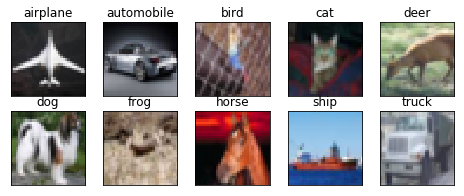

In [42]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Define various functions e.g  plot Model History and and Accuracy

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Set the training and Test features

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [46]:
# summarize dataset shape
print('Train', train_features.shape, train_labels.shape)
print('Test', (test_features.shape, test_labels.shape))
# summarize pixel values
print('Train', train_features.min(), train_features.max(), train_features.mean(), train_features.std())
print('Test', test_features.min(), test_features.max(), test_features.mean(), test_features.std())

Train (50000, 32, 32, 3) (50000, 10)
Test ((10000, 32, 32, 3), (10000, 10))
Train 0.0 1.0 0.4733649 0.25156906
Test 0.0 1.0 0.47658524 0.25121963


### Plot training image

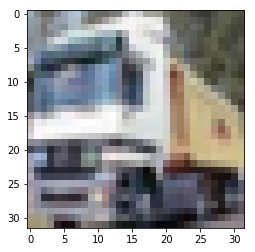

In [47]:
# Plot the training image
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(train_features[1])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


In [0]:
# checkpoint
filepath="./Assignment6_07_06_2019_evng-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler, verbose=1)]

## Define the Model

In [0]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, SeparableConv2D
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D,SeparableConv2D


In [0]:
input_shape = (32,32)+(3,)
img_input = Input(shape = input_shape)
layer1=SeparableConv2D(10, (5,5), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(img_input)
#x = Conv2D(32,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(img_input)#(3*3,32*32) of the form (effective global receptive field,output channel size )
layer1 = BatchNormalization(axis = 3)(layer1)
layer1 = Activation('relu')(layer1)
skip_layer1 = layer1
#layer1 = Activation('relu')(layer1)
#layer1 = Dropout(0.1)(layer1)

In [0]:
#input_shape = (32,32)+(3,)
#img_input = Input(shape = input_shape)
#layer1=SeparableConv2D(10, (5,5), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(img_input)
#x = Conv2D(32,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(img_input)#(3*3,32*32) of the form (effective global receptive field,output channel size )
layer2 = Conv2D(10,5,strides=1,padding='same',data_format='channels_last',use_bias=False)(layer1)
layer2 = BatchNormalization(axis = 3)(layer2)
layer2 = Activation('relu')(layer2)
skip_layer2= layer2
#layer1 = Activation('relu')(layer1)
#layer2 = Dropout(0.1)(layer2)

In [0]:
layer3 = Conv2D(10,5,strides=1,padding='same',data_format='channels_last',use_bias=False)(layer2)
layer3 = BatchNormalization(axis = 3)(layer3)
layer3 = Activation('relu')(layer3)
skip_layer3 = layer3
layer3 = concatenate([layer3, skip_layer1])
#layer1 = Activation('relu')(layer1)
#layer3 = Dropout(0.1)(layer3)

In [0]:
layer4 =SeparableConv2D(10, (5,5), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(layer3)

layer4 = BatchNormalization(axis = 3)(layer4)
layer4 = Activation('relu')(layer4)
skip_layer4 = layer4
layer4 = concatenate([layer4, skip_layer1])
#layer1 = Activation('relu')(layer1)
#layer4 = Dropout(0.1)(layer4)

In [0]:
#layer5 =SeparableConv2D(10, (5,5), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(layer3)

layer5 = MaxPooling2D(pool_size=(2,2),data_format='channels_last')(layer4)
#layer5 = BatchNormalization(axis = 3)(layer5)
#layer5 = Activation('relu')(layer5)

#layer5 = concatenate([layer5, layer1])

In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

In [0]:
import tensorflow as tf
layer6 = SeparableConv2D(10, (3,3), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(layer5)
layer6 = BatchNormalization(axis = 3)(layer6)
layer6 = Activation('relu')(layer6)
skip_layer6 = layer6
skip_layer4 = Lambda(space_to_depth_x2)(skip_layer4)
skip_layer1 = Lambda(space_to_depth_x2)(skip_layer1)
layer6 = concatenate([layer6, skip_layer4,skip_layer1])



In [0]:
layer7 = Conv2D(10,5,strides=1,padding='same',data_format='channels_last',use_bias=False)(layer6)
layer7 = BatchNormalization(axis = 3)(layer7)
layer7 = Activation('relu')(layer7)
skip_layer7 = layer7
#layer4 = Activation('relu')(layer4)
skip_layer3 = Lambda(space_to_depth_x2)(skip_layer3)
layer7 = concatenate([layer7,skip_layer4, skip_layer3,skip_layer6])
#layer3 = concatenate([layer3, layer1])


In [0]:
layer8 =  SeparableConv2D(10, (3,3), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(layer7)
layer8 = BatchNormalization(axis = 3)(layer8)
layer8 = Activation('relu')(layer8)
skip_layer8 = layer8
#layer4 = Activation('relu')(layer4)
#layer3 = Lambda(space_to_depth_x2)(layer3)
layer8 = concatenate([layer8,skip_layer7, skip_layer3,skip_layer6,skip_layer1,skip_layer4])
#layer3 = concatenate([layer3, layer1])


In [0]:
layer9 =  SeparableConv2D(10, (5,5), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(layer8)
layer9 = BatchNormalization(axis = 3)(layer9)
layer9 = Activation('relu')(layer9)
layer9 = concatenate([layer9,skip_layer6, skip_layer8,skip_layer1,skip_layer4])


In [0]:
layer10 = MaxPooling2D(pool_size=(2,2),data_format='channels_last')(layer9)
skip_layer7 = Lambda(space_to_depth_x2)(skip_layer7)
layer10 =concatenate([layer10, skip_layer7])

In [0]:
layer11 = Conv2D(10,5,strides=1,padding='same',data_format='channels_last',use_bias=False)(layer10)
layer11 = BatchNormalization(axis = 3)(layer11)
layer11 = Activation('relu')(layer11)
skip_layer11 = layer11
skip_layer8 = Lambda(space_to_depth_x2)(skip_layer8)
skip_layer1 = Lambda(space_to_depth_x2)(skip_layer1)
skip_layer2 = Lambda(space_to_depth_x2)(skip_layer2)
skip_layer2 = Lambda(space_to_depth_x2)(skip_layer2)
layer11 =concatenate([layer11, skip_layer8,skip_layer1,skip_layer2])

In [0]:
layer12 =SeparableConv2D(10, (5,5), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(layer11)
layer12 = BatchNormalization(axis = 3)(layer12)
layer12 = Activation('relu')(layer12)
skip_layer12 = layer12
skip_layer3 = Lambda(space_to_depth_x2)(skip_layer3)
skip_layer6 = Lambda(space_to_depth_x2)(skip_layer6)
layer12 =concatenate([layer12, skip_layer11,skip_layer6,skip_layer2,skip_layer3])

In [0]:
layer13 = Conv2D(10,3,strides=1,padding='same',data_format='channels_last',use_bias=False)(layer12)
layer13 = BatchNormalization(axis = 3)(layer13)
layer13 = Activation('relu')(layer13)
skip_layer4 = Lambda(space_to_depth_x2)(skip_layer4)
#layer1 = Lambda(space_to_depth_x2)(layer1)
#layer2 = Lambda(space_to_depth_x2)(layer2)
#layer2 = Lambda(space_to_depth_x2)(layer2)
layer13 =concatenate([layer13, skip_layer8,skip_layer3,skip_layer12,skip_layer4,skip_layer6,skip_layer1])

In [0]:
layer14 =SeparableConv2D(10, (5,5), strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False)(layer13)
layer14 = BatchNormalization(axis = 3)(layer14)
layer14 = Activation('relu')(layer14)
#layer3 = Lambda(space_to_depth_x2)(layer3)
#layer6 = Lambda(space_to_depth_x2)(layer6)
layer14 =concatenate([layer14, skip_layer12,skip_layer8,skip_layer4])

In [0]:
layer14 = Conv2D(num_classes,(8,8))(layer14)
layer14 = Flatten()(layer14)
output = Activation('softmax')(layer14)


In [0]:
model = Model(inputs=img_input, outputs=output)

In [71]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_9 (SeparableCo (None, 32, 32, 10)   105         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 32, 32, 10)   40          separable_conv2d_9[0][0]         
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 32, 32, 10)   0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
conv2d_9 (

## Compile the Model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
# checkpoint
filepath="./Assignment6_12_06_2019-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler, verbose=1)]

### Perform Image Normalization and execute the Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 39s 99ms/step - loss: 11.5026 - acc: 0.2243 - val_loss: 11.5823 - val_acc: 0.2178

Epoch 00001: val_acc improved from -inf to 0.21780, saving model to ./Assignment6_12_06_2019-01-0.22.hdf5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 35s 90ms/step - loss: 10.4395 - acc: 0.2603 - val_loss: 3.5008 - val_acc: 0.2090

Epoch 00002: val_acc did not improve from 0.21780
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 35s 89ms/step - loss: 1.2985 - acc: 0.5336 - val_loss: 1.1453 - val_acc: 0.5921

Epoch 00003: val_acc improved from 0.21780 to 0.59210, saving model to ./Assignment6_12_06_2019-03-0.59.hdf5
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [======================

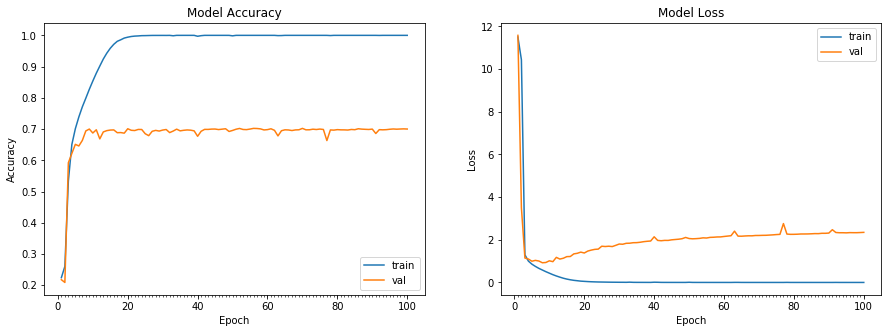

Accuracy on test data is: 70.01


In [75]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,data_format='channels_last')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callbacks_list )
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))